<b>Q2 - initial value and load data</b>
<br>
It is assumed that problem2data.txt is the same directory of this ipynb file

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# import the data from problem2data.txt, which is assumed to be the same directory
data_array = np.loadtxt('./problem2data.txt', dtype='float', delimiter=' ', unpack=True)

col1, col2, col3 = np.split(data_array, 3)
col3 = np.asarray(col3, dtype = 'int')

parameters_dictionary = {'x1': col1[0], 'x2': col2[0]}
label_dictionary = {'label': col3[0]}

df_X = pd.DataFrame(data = parameters_dictionary)
df_Y = pd.DataFrame(data = label_dictionary)

<b>Part A</b> -  Build a logistic regression classifier by using a polynomial function of order 1 

In [5]:
#  Applying 5-fold-cross-validation
k = 5
kf = KFold(n_splits = k, random_state = None)
model = LogisticRegression()


acc_score = []
training_f1_score = []
testing_f1_score = []

for train_index , test_index in kf.split(df_X):
    X_train , X_test = df_X.iloc[train_index,:],df_X.iloc[test_index,:]
    y_train, y_test = df_Y.iloc[train_index], df_Y.iloc[test_index]

    y_train = y_train.to_numpy().ravel()
    y_test = y_test.to_numpy().ravel()
    
    # build the model based on training data
    model.fit(X_train,y_train)


    # insert testing dataset to get the predicted output
    pred_testValues = model.predict(X_test)
    pred_trainValues = model.predict(X_train)

    # count the f1 score(true records / predicted records)
    test_f1 = f1_score(y_test, pred_testValues)
    testing_f1_score.append(test_f1)

    training_f1 = f1_score(y_train, pred_trainValues)
    training_f1_score.append(training_f1)
    # print('test_f1: ', test_f1)
    
    acc = accuracy_score(pred_testValues , y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print(' F1 scores on test set: {}'.format(testing_f1_score))
print(' F1 scores on train set: {}'.format(training_f1_score))

accuracy of each fold - [0.42, 0.51, 0.46, 0.51, 0.44]
Avg accuracy : 0.46799999999999997
 F1 scores on test set: [0.0, 0.5585585585585586, 0.4375, 0.6315789473684211, 0.44]
 F1 scores on train set: [0.0, 0.6122448979591838, 0.5467625899280575, 0.70863309352518, 0.5125628140703518]


<b>Part B</b> - build model with polynomials of order 2 to 12.

In [6]:
#  Applying 5-fold-cross-validation
k = 5
kf = KFold(n_splits = k, random_state = None)
model = LogisticRegression(max_iter=10000)

# A function to run 5-fold cross validation on polynomial_logistic_regression
def polynomial_logistic_regression(input_X, input_Y, degree_N):

    testing_f1_score = []
    training_f1_score = []
    
    
    for train_index , test_index in kf.split(df_X):

        X_train , X_test = input_X.iloc[train_index,:], input_X.iloc[test_index,:]
        y_train, y_test = input_Y.iloc[train_index], input_Y.iloc[test_index]

        # print('X_train: ', X_train)

        y_train = y_train.to_numpy().ravel()
        y_test = y_test.to_numpy().ravel()
        
        # polynomial function
        poly = PolynomialFeatures(degree = degree_N, interaction_only=False, include_bias=False)
        X_poly_test = poly.fit_transform(X_test)
        X_poly_train = poly.fit_transform(X_train)
        
        # build the model based on training data with polynomial
        model.fit(X_poly_train, y_train)
        

        # insert testing dataset to get the predicted output
        pred_testValues = model.predict(X_poly_test)
        pred_trainValues = model.predict(X_poly_train)

        # count the f1 score(true records / predicted records)
        test_f1 = f1_score(y_test, pred_testValues)
        testing_f1_score.append(test_f1)

        training_f1 = f1_score(y_train, pred_trainValues)
        training_f1_score.append(training_f1)

    return testing_f1_score, training_f1_score


In [8]:
Npolynomials_testing_f1 = []
Npolynomials_training_f1 = []

for i in range(2, 13):  # polynomial of order 2 to 12
    # print('For polynomials of order', i, ':')
    testing_f1_score, training_f1_score = polynomial_logistic_regression(df_X, df_Y, i)

    Npolynomials_testing_f1.append(testing_f1_score)
    Npolynomials_training_f1.append(training_f1_score)

    # # print out the result with 4 decimal place
    # np_testing_f1 = np.asarray(testing_f1_score)
    # np_training_f1 = np.asarray(training_f1_score)
    # print('\tF1 scores on test set: {}'.format(np.round(np_testing_f1, 4)))
    # print('\tF1 scores on train set: {}\n'.format(np.round(np_training_f1, 4)))

print('testing set F1 score (poly 2 to 12) under 5-fold-cross-validation: ')
for row in Npolynomials_testing_f1:
    print(row)

print('\ntraining set F1 score (poly 2 to 12) under 5-fold-cross-validation: ')
for row in Npolynomials_training_f1:
    print(row)

# result of polynomials of order 2 to 12
# Npolynomials_testing_f1
# Npolynomials_training_f1

testing set F1 score (poly 2 to 12) under 5-fold-cross-validation: 
[0.8500000000000001, 0.8247422680412372, 0.8247422680412372, 0.7500000000000001, 0.7115384615384615]
[0.8571428571428572, 0.8247422680412372, 0.8210526315789473, 0.7422680412371134, 0.6990291262135921]
[0.8333333333333334, 0.8247422680412372, 0.8247422680412372, 0.7446808510638298, 0.7102803738317756]
[0.8292682926829268, 0.8282828282828283, 0.8080808080808082, 0.7422680412371134, 0.709090909090909]
[0.8455284552845529, 0.8, 0.7722772277227722, 0.7474747474747475, 0.7142857142857142]
[0.8387096774193549, 0.8, 0.7920792079207921, 0.7422680412371134, 0.6956521739130435]
[0.8253968253968255, 0.787878787878788, 0.7619047619047619, 0.7200000000000001, 0.7027027027027027]
[0.8253968253968255, 0.787878787878788, 0.7692307692307693, 0.7346938775510203, 0.6902654867256637]
[0.8095238095238094, 0.8080808080808081, 0.7572815533980582, 0.6990291262135923, 0.6964285714285714]
[0.8031496062992126, 0.8039215686274509, 0.7572815533980

<b>Part C</b>

Repeat parts (a-b) 50 times, and estimate the average F1 score for each polynomial order (average
across its 5 × 50 runs, both for training and test sets). Generate a plot that shows the F1 scores
versus the polynomial order.


final: 
	average_testing_f1_score:
		 [0.41352750118539594, 0.7922045995241872, 0.7888469848427494, 0.7875558188622825, 0.7833981758749171, 0.7759132289535573, 0.7737418200980607, 0.7595766155766156, 0.7614931493566134, 0.7540687737289679, 0.7527341432779026, 0.7504673269779273]

	average_training_f1_score:
		 [0.4760406790965545, 0.8022499763891385, 0.8021756525356102, 0.8011764516132086, 0.8041372018780469, 0.8113935069171104, 0.8116875948815354, 0.823450599806478, 0.8246182999966803, 0.832373174079394, 0.8391146432522852, 0.8449448200467897] 




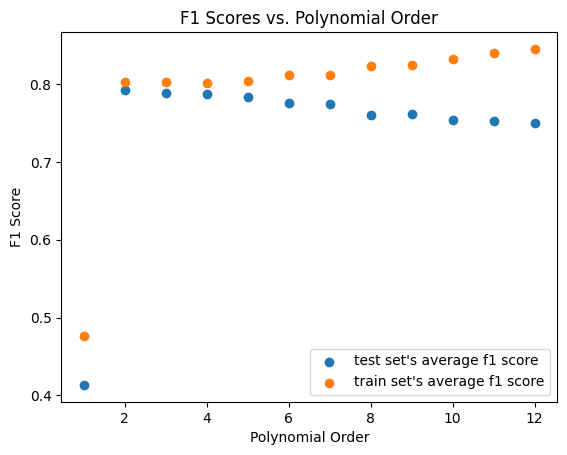

In [22]:
# implement code here

fifty_testing_f1_score = []
fifty_training_f1_score = []

for i in range(12):
    fifty_testing_f1_score.append([])
    fifty_training_f1_score.append([])

## repeat 50 times
repeat_times = 50
for i in range(0, repeat_times):
    for j in range(1, 13): # from polynomials of order 1 to 12
        testing_f1_score, training_f1_score = polynomial_logistic_regression(df_X, df_Y, j)

        testing_f1_score_mean = np.mean(testing_f1_score)
        training_f1_score_mean = np.mean(training_f1_score)

        # print('testing_f1_score_mean: ', testing_f1_score_mean)
        # print('training_f1_score_mean: ', training_f1_score_mean)

        fifty_testing_f1_score[j-1].append(testing_f1_score_mean)
        fifty_training_f1_score[j-1].append(training_f1_score_mean)

        # np.append(fifty_testing_f1_score[j], )
        # np.append(fifty_training_f1_score[j], )


    # print('For iteration', i+1, ':')
    # print('\tfifty_testing_f1_score:')
    # for j in range(len(fifty_testing_f1_score)):
    #     print('\t\tpoly ', j+1, ':', fifty_testing_f1_score[j])
    # print('\n')

    # print('\tfifty_training_f1_score:')
    # for j in range(len(fifty_training_f1_score)):
    #     print('\t\tpoly ', j+1, ':', fifty_training_f1_score[j])
    # print('\n')



# take the mean of 50 times in respect to 12 polynomial_logistic_regression
N12_x_axis = []
average_testing_f1_score = []
average_training_f1_score = []


for i in range(1, 13):
    N12_x_axis.append(i)
    average_testing_f1_score.append(np.mean(fifty_testing_f1_score[i-1]))
    average_training_f1_score.append(np.mean(fifty_training_f1_score[i-1]))

# print out the average score of testing and training set
print('\nfinal: ')
print('\taverage_testing_f1_score:\n\t\t', average_testing_f1_score)
print('\n\taverage_training_f1_score:\n\t\t', average_training_f1_score, "\n\n")


plt.scatter(N12_x_axis, average_testing_f1_score, label='test set\'s average f1 score')
plt.scatter(N12_x_axis, average_training_f1_score, label='train set\'s average f1 score')

plt.xlabel('Polynomial Order')
plt.ylabel('F1 Score')
plt.title('F1 Scores vs. Polynomial Order')
plt.legend()

plt.show()

<b>Part D</b> - Discuss relationship between F1 scores of the model and the polynomial order
<br><br>

From the above graph, indicates that the logistic regression classifier model performs well under the polynomial order of 2. 

F1 score is <i>(2×Precision×Recall) / Precision + Recall</i>. In general, the higher the F1 score, more accurately the model predicted.

The model with polynomial regression with <b>degree = 1</b> is <b>underfitting</b>. 

Although the performance of training dataset raise when the polynomial order increases, the performance of test dataset is decreasing. The F1 score gap between testing and training data increase when the polynomial order increases. 

This result shows that increasing the polynomial orders of the logistic regression model may occur an <b>overfitting</b> problem. Therefore, the trained model is not generalized to unseen data and the accuracy of the predicted results (testing set’s average f1 score) decreases when polynomial order increases. 

We can see that the testing data with <b>degree 2</b> have highest f1 score under testing dataset and the smallest gap with training data. Therefore it is a good model.
